In [56]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date

f = open("transaction-data-adhoc-analysis.json", "r")
data = json.load(f)
df_data = pd.DataFrame(data)


In [3]:
### String manipulation to store the item list and the items' respective quantities
### Generating a column for each item to store the quantity of the bought item

def order_count(orders, column):
    order = [x.split(",") for x in orders.split(";")]
    order = [item for sublist in order for item in sublist]
    order_number = order[order.index(column) + 1]
    order_number = int(order_number[2:len(order_number)-1])
    return order_number

order_list = []
for orders in df_data['transaction_items']:
    for order in orders.split(";"):
        category, order_name, order_number = order.split(",")
        if order_name not in order_list:
            order_list.append(order_name)
    
for orders in order_list:
    df_data[orders] = df_data['transaction_items'].apply(lambda row: order_count(row, orders) if orders in row else 0)

In [4]:
### String manipulation to find the month of purchase

def find_month(date):
    months = ["", "January", "February", "March", 
              "April", "May", "June", "July", "August",
             "September", "October", "November", "December"]
    
    return months[int(date[5:7])]

df_data['month'] = df_data['transaction_date'].apply(find_month)

In [5]:
# Creating a column to find their age and age bracket

def find_age(birthday):
    birthday = datetime.strptime(birthday, "%Y/%m/%d").date()
    today = date.today()
    return today.year - birthday.year

def find_age_bracket(birthday):
    birthday = datetime.strptime(birthday, "%Y/%m/%d").date()
    year = birthday.year
    
    age_bracket_year = [1927, 1945, 1964, 1980, 1996, 2012, 2025]
    age_bracket_name = ['Greatest', 'Silent', 'Baby Boomer', 'Generation X', 
                        'Millennials', 'Generation Z', 'Generation Alpha']
    
    for x in range(7):
        if year <= age_bracket_year[x]:
            return age_bracket_name[x]

df_data['age'] = df_data['birthdate'].apply(find_age)
df_data['age_bracket']= df_data['birthdate'].apply(find_age_bracket)

In [6]:
### Generating a pivot table of the age brackets and the items
### Output: a table displaying how much a generation buy a certain item

df_item_agebracket = pd.pivot_table(data = df_data, index = ('age_bracket'), 
                                    values = order_list, aggfunc = sum, 
                                    margins = True, margins_name = 'Total')
df_item_agebracket = df_item_agebracket.reindex(['Greatest', 'Silent', 'Baby Boomer', 'Generation X', 
                                                'Millennials', 'Generation Z', 'Generation Alpha', 
                                                'Total'])
df_item_agebracket['Total'] = df_item_agebracket.sum(axis = 1)
df_item_agebracket

,Beef Chicharon,Gummy Vitamins,Gummy Worms,Kimchi and Seaweed,Nutrional Milk,Orange Beans,Yummy Vegetables,Total
age_bracket,,,,,,,,
Greatest,11559,11531,11509,11348,11711,11309,11603,80570
Silent,9144,9256,9296,9215,9033,9358,9322,64624
Baby Boomer,9751,9513,9460,9353,9305,9287,9332,66001
Generation X,8056,8325,8076,8059,7943,8150,7980,56589
Millennials,7722,7844,7815,8140,7627,7743,8052,54943
Generation Z,8285,8271,8314,8386,8254,8499,8285,58294
Generation Alpha,4785,4836,4849,4889,4855,5060,4855,34129
Total,59302,59576,59319,59390,58728,59406,59429,415150


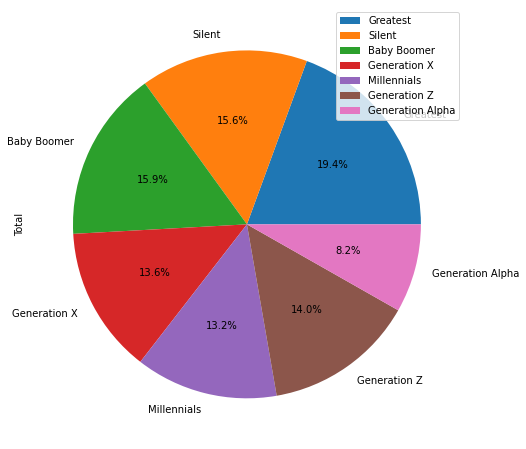

In [7]:
### Showcasing the age demographic of the customers
### Output: a pie chart showing a breakdown of the customers by generation

df_item_agebracket.loc[:'Generation Alpha', 'Total'].plot(kind="pie", 
                                                      figsize = (13, 8), 
                                                      subplots=True,
                                                      autopct='%1.1f%%')
plt.legend(['Greatest', 'Silent', 'Baby Boomer', 'Generation X', 'Millennials', 
            'Generation Z', 'Generation Alpha'])

In [8]:
### String manipulation to find the state from the indicated address
### Analysing the number of transactions from each state
### Output: a table displaying the ten states with most transactions with a breakdown of the quantity bought per item
states = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 
              'CO': 'Colorado', 'CT': 'Connecticut','DE': 'Delaware','DC': 'District of Columbia',
              'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois',
              'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 
              'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 
              'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska',
              'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 
              'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
              'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island',
              'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas',
              'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 
              'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 
              'AA': 'Armed Forces the Americas', 'AE': 'Armed Forces Europe', 
              'AP': 'Armed Forces Pacific'}

def find_state(address):
    return states[address.split()[-2]]

df_data['state_address'] = df_data['address'].apply(find_state)
df_itemstate = pd.pivot_table(data = df_data, index = 'state_address', values = order_list, aggfunc = sum)
df_itemstate['Total'] = df_itemstate.apply(np.sum, axis = 1)
df_itemstate.sort_values(by = ['Total'], ascending = False).head(10)

,Beef Chicharon,Gummy Vitamins,Gummy Worms,Kimchi and Seaweed,Nutrional Milk,Orange Beans,Yummy Vegetables,Total
state_address,,,,,,,,
Armed Forces the Americas,2068,2226,2351,2033,1955,2164,2224,15021
Armed Forces Europe,2023,2139,2020,2110,2178,2208,2110,14788
Armed Forces Pacific,1913,2077,2060,2076,1910,2040,1985,14061
Wyoming,1247,1304,1257,1330,1401,1367,1328,9234
Hawaii,1275,1192,1263,1291,1288,1255,1152,8716
Ohio,1166,1221,1192,1163,1171,1299,1300,8512
Utah,1122,1106,1233,1193,1146,1183,1148,8131
Maryland,1174,1193,1208,1114,1171,1042,1107,8009
Illinois,1151,1091,1112,1109,1137,1101,1174,7875


In [9]:
### Creating a pivot table to show the sum of all instances when an item is bought for a certain month
### Output: a table displaying the sales of a certain item for the particular month

df_pivotcount_unarranged = pd.pivot_table(data = df_data, index = 'month', 
                                          values = ['Beef Chicharon', 'Nutrional Milk', 'Orange Beans', 
                                                    'Gummy Vitamins', 'Yummy Vegetables', 'Gummy Worms', 
                                                    'Kimchi and Seaweed'], 
                                          aggfunc = 'sum', margins = True, margins_name = 'Total')
df_pivotcount = df_pivotcount_unarranged.reindex(index = ['January', 'February', 'March', 
                                                          'April', 'May', 'June', 'Total'])

df_pivotcount

,Beef Chicharon,Gummy Vitamins,Gummy Worms,Kimchi and Seaweed,Nutrional Milk,Orange Beans,Yummy Vegetables
month,,,,,,,
January,9665,9681,9559,9676,9727,9774,9959
February,10001,9980,9996,9949,9691,10037,10256
March,9816,10145,9986,9967,9876,9611,9896
April,9890,9842,10043,9921,9786,9914,9861
May,10028,9948,9801,9773,9881,9964,9735
June,9902,9980,9934,10104,9767,10106,9722
Total,59302,59576,59319,59390,58728,59406,59429


<AxesSubplot:xlabel='month'>

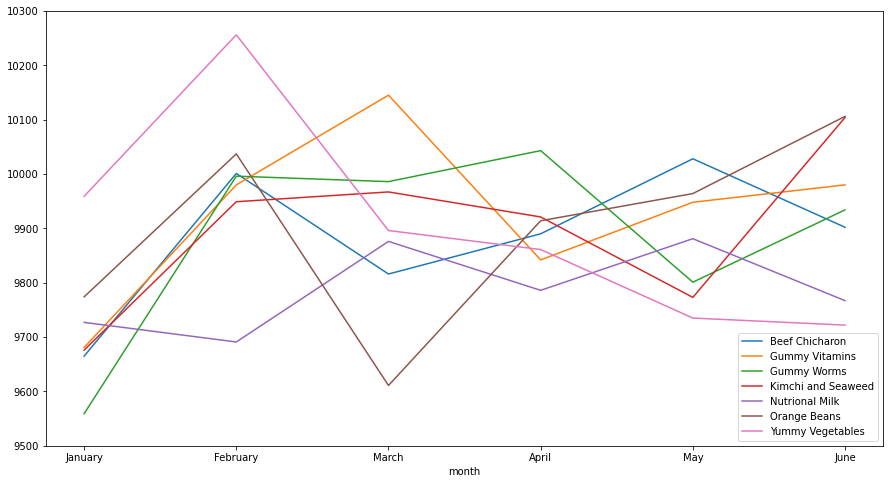

In [10]:
### Presenting the sales trend of each item
### Output: a line graph indicating the sales of each item per month
df_pivotcount.loc[:'June', :].plot(kind="line", figsize = (15, 8), ylim = [9500, 10300])

In [11]:
### Finding the price per item by looking at transactions with a purchase of only one type of item
### Output: table displaying item price

def item_number(N):
    string = "".join([str(x) for x in list(N)])
    return len(string.replace("0", ""))

df_datavalue = df_data[["username", "month", "transaction_items", "transaction_value"] + order_list].copy()
df_datavalue["item_number"] = df_datavalue.loc[:, 'Beef Chicharon':'Kimchi and Seaweed'].apply(item_number, axis = 1)

price_list = {}
for order in order_list:
    temp = df_datavalue[(df_datavalue["item_number"] == 1) & (df_datavalue[order] != 0)].head(1)
    price_list[order] = [float(temp["transaction_value"] / temp[order])] 
    
df_price_list = pd.DataFrame(price_list)
df_price_list = df_price_list.T.rename(columns = {0: 'Price'})
df_price_list.index.name = 'Items'
df_price_list

,Price
Items,
Beef Chicharon,1299.0
Nutrional Milk,1990.0
Orange Beans,199.0
Gummy Vitamins,1500.0
Yummy Vegetables,500.0
Gummy Worms,150.0
Kimchi and Seaweed,799.0


In [12]:
### Finding the generated revenue from a certain item in a particular month by multiplying the price to the item sales
### Output: table displaying the revenue generated from a certain item for a particular motnth

df_salerevenue = df_pivotcount.multiply(np.array(df_price_list.T), axis = 'columns')
df_salerevenue['Total'] = df_salerevenue.sum(axis = 1)
df_salerevenue

,Beef Chicharon,Gummy Vitamins,Gummy Worms,Kimchi and Seaweed,Nutrional Milk,Orange Beans,Yummy Vegetables,Total
month,,,,,,,,
January,12554835.0,19265190.0,1902241.0,14514000.0,4863500.0,1466100.0,7957241.0,62523107.0
February,12991299.0,19860200.0,1989204.0,14923500.0,4845500.0,1505550.0,8194544.0,64309797.0
March,12750984.0,20188550.0,1987214.0,14950500.0,4938000.0,1441650.0,7906904.0,64163802.0
April,12847110.0,19585580.0,1998557.0,14881500.0,4893000.0,1487100.0,7878939.0,63571786.0
May,13026372.0,19796520.0,1950399.0,14659500.0,4940500.0,1494600.0,7778265.0,63646156.0
June,12862698.0,19860200.0,1976866.0,15156000.0,4883500.0,1515900.0,7767878.0,64023042.0
Total,77033298.0,118556240.0,11804481.0,89085000.0,29364000.0,8910900.0,47483771.0,382237690.0


In [13]:
### Creating a pivot table to display the number of instances a transaction was done with a customer
### Output: A table presenting the ten customers who purchased the most for the last six months

df_customercount_unarranged = pd.pivot_table(data = df_datavalue, index = 'username', 
                                  columns = 'month', values = 'item_number', 
                                  aggfunc = len, fill_value = 0)
df_customercount = df_customercount_unarranged[['January', 'February', 'March', 'April', 'May', 'June']]

df_customerlist = pd.DataFrame(df_customercount.sum(axis = 1), columns = ['transaction_instances'])
df_customerlist.sort_values(by = 'transaction_instances', ascending = False).head(10)

,transaction_instances
username,
tsmith,53
cjones,52
zmartin,48
ysmith,46
esmith,44
jonesnicole,43
xjohnson,42
asmith,40
jsmith,38


In [14]:
### Categorizing customers into loyalty categories
### Output: Table displaying the number of customers in a certain loyalty category for a particular month

def convert_string(N):
    return "".join([str(i) for i in list(N)])

def check_status(status):
    status = status.lstrip('0')
    string = ""
    if status == "":
        return "None"
    
    if status[-1] == '0':
        string += "Inactive"
        
    if len(status) == 1:
        string += "First-Timer"
        
    try: 
        if status[-2] + status [-1] == '11':
            string += "Repeater"
    except:
        pass
    
    try: 
        if status[-2] + status [-1] == '01':
            string += "Returnee"
    except:
        pass
    
    if set(status) == {'1'}:
        string += "Engaged"
    
    
    return "None" if string == "" else string
        
        

for month in ['January', 'February', 'March', 'April', 'May', 'June']:
    df_customercount[month] = df_customercount[month].apply(lambda x: 0 if x == 0 else 1)

for month in ['January', 'February', 'March', 'April', 'May', 'June']:
    df_customercount["transposed_status"] = df_customercount.loc[:,'January': month].apply(convert_string, axis = 1)
    df_customercount[month + " Status"] = df_customercount["transposed_status"].apply(check_status)

df_customercategory = []
status_list = ["Engaged", "Repeater", "Inactive", "First-Timer" , "Returnee"]
month_list = ['January', 'February', 'March', 'April', 'May', 'June']
for month in month_list:
    df_status = dict()
    for status in status_list:
        df_status[status] = len(df_customercount[df_customercount[month + ' Status'].str.contains(status)])
    df_customercategory.append(df_status)
    
df_customercnt = pd.DataFrame(df_customercategory, index = month_list)
df_customercnt

,Engaged,Repeater,Inactive,First-Timer,Returnee
January,6583,0,0,6583,0
February,6630,5167,1416,1463,0
March,5579,5239,1728,340,1079
April,4468,5191,1912,94,1283
May,3590,5126,1915,22,1439
June,2911,5208,1840,3,1454


<AxesSubplot:>

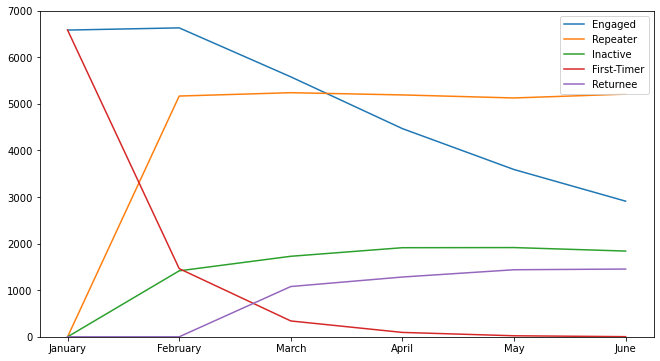

In [49]:
### Presenting the customer loyalty trend per month
### Output: a line graph indicating the number of customers in each category per month
df_customercnt.plot(kind="line", figsize = (11, 6), ylim = [0, 7000])

In [50]:
### Greatest

df_data_temp = df_data[['username', 'age', 'age_bracket', 'state_address']].drop_duplicates(subset = ['username'])
df_customercount_withitems = pd.concat([df_customercount.loc[:, 'transposed_status':], 
                                        df_data_temp.set_index('username')], axis=1, join='inner')

df_customercategory_agebracket = []
agebracket_list = ['Greatest', 'Silent', 'Baby Boomer', 'Generation X', 
                   'Millennials', 'Generation Z', 'Generation Alpha']

for month in month_list:
    df_status = dict()
    for status in status_list:
        df_status[status] = len(df_customercount_withitems[(df_customercount_withitems[month + ' Status'].str.contains(status)) 
                                                           & (df_customercount_withitems['age_bracket'] == 'Greatest')])
    df_customercategory_agebracket.append(df_status)
    
df_customercnt_agebracket = pd.DataFrame(df_customercategory_agebracket, index = month_list)
df_customercnt_agebracket

,Engaged,Repeater,Inactive,First-Timer,Returnee
January,1286,0,0,1286,0
February,1294,1009,277,285,0
March,1084,1023,338,61,210
April,853,999,381,14,252
May,700,993,363,5,290
June,554,1025,347,0,279


<AxesSubplot:>

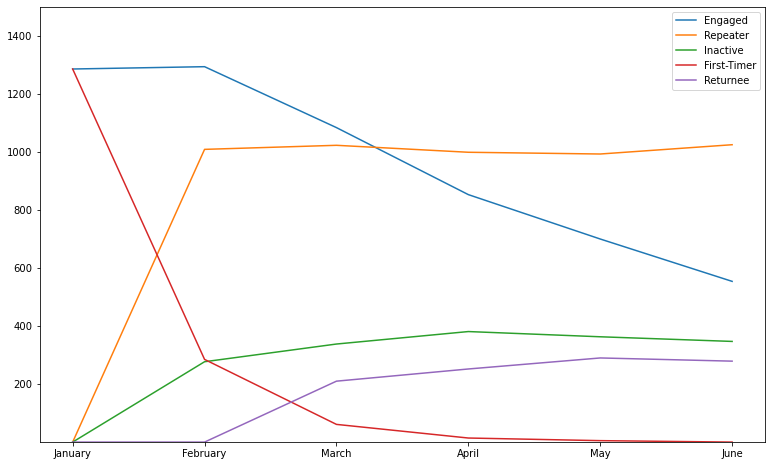

In [51]:
df_customercnt_agebracket.plot(kind="line", figsize = (13, 8), ylim = [1, 1500])

In [52]:
### Silent

df_customercategory_agebracket = []
for month in month_list:
    df_status = dict()
    for status in status_list:
        df_status[status] = len(df_customercount_withitems[(df_customercount_withitems[month + ' Status'].str.contains(status)) 
                                                           & (df_customercount_withitems['age_bracket'] == 'Silent')])
    df_customercategory_agebracket.append(df_status)
    
df_customercnt_agebracket = pd.DataFrame(df_customercategory_agebracket, index = month_list)
df_customercnt_agebracket

,Engaged,Repeater,Inactive,First-Timer,Returnee
January,1026,0,0,1026,0
February,1031,810,216,221,0
March,902,841,247,61,159
April,711,817,310,10,181
May,572,799,296,3,223
June,473,816,283,0,222


<AxesSubplot:>

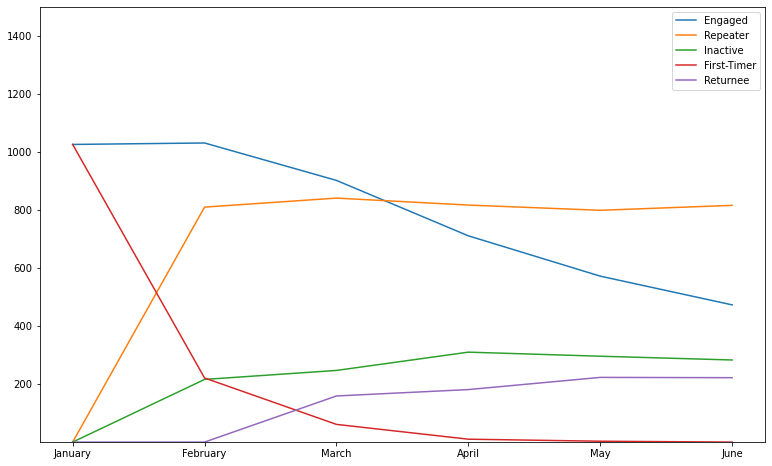

In [53]:
df_customercnt_agebracket.plot(kind="line", figsize = (13, 8), ylim = [1, 1500])

In [54]:
### Baby Boomer

df_customercategory_agebracket = []
for month in month_list:
    df_status = dict()
    for status in status_list:
        df_status[status] = len(df_customercount_withitems[(df_customercount_withitems[month + ' Status'].str.contains(status)) 
                                                           & (df_customercount_withitems['age_bracket'] == 'Baby Boomer')])
    df_customercategory_agebracket.append(df_status)
    
df_customercnt_agebracket = pd.DataFrame(df_customercategory_agebracket, index = month_list)
df_customercnt_agebracket

,Engaged,Repeater,Inactive,First-Timer,Returnee
January,1048,0,0,1048,0
February,1068,830,218,238,0
March,904,853,269,51,164
April,711,822,314,18,201
May,576,820,306,5,229
June,469,819,297,1,244


<AxesSubplot:>

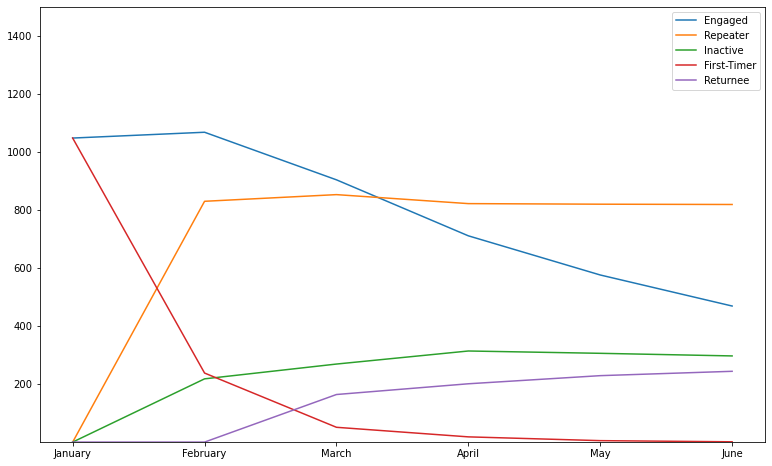

In [55]:
df_customercnt_agebracket.plot(kind="line", figsize = (13, 8), ylim = [1, 1500])

In [22]:
### Generation X

df_customercategory_agebracket = []
for month in month_list:
    df_status = dict()
    for status in status_list:
        df_status[status] = len(df_customercount_withitems[(df_customercount_withitems[month + ' Status'].str.contains(status)) 
                                                           & (df_customercount_withitems['age_bracket'] == 'Generation X')])
    df_customercategory_agebracket.append(df_status)
    
df_customercnt_agebracket = pd.DataFrame(df_customercategory_agebracket, index = month_list)
df_customercnt_agebracket

,Engaged,Repeater,Inactive,First-Timer,Returnee
January,894,0,0,894,0
February,910,705,189,205,0
March,750,706,245,44,148
April,621,723,256,13,164
May,488,692,276,4,188
June,401,695,245,0,220


<AxesSubplot:>

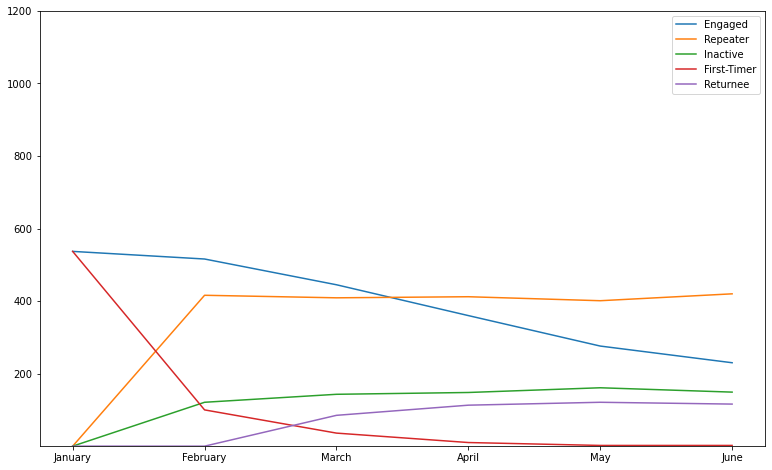

In [45]:
df_customercnt_agebracket.plot(kind="line", figsize = (13, 8), ylim = [1, 1500])

In [24]:
### Millennials

df_customercategory_agebracket = []
for month in month_list:
    df_status = dict()
    for status in status_list:
        df_status[status] = len(df_customercount_withitems[(df_customercount_withitems[month + ' Status'].str.contains(status)) 
                                                           & (df_customercount_withitems['age_bracket'] == 'Millennials')])
    df_customercategory_agebracket.append(df_status)
    
df_customercnt_agebracket = pd.DataFrame(df_customercategory_agebracket, index = month_list)
df_customercnt_agebracket

,Engaged,Repeater,Inactive,First-Timer,Returnee
January,876,0,0,876,0
February,882,679,197,203,0
March,715,679,238,36,162
April,566,674,256,16,185
May,462,681,253,2,197
June,367,692,259,0,182


<AxesSubplot:>

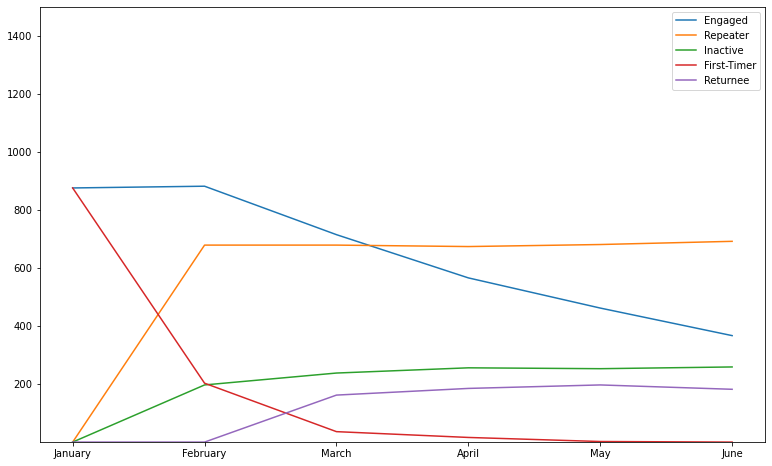

In [25]:
df_customercnt_agebracket.plot(kind="line", figsize = (13, 8), ylim = [1, 1500])

In [26]:
### Generation Z

df_customercategory_agebracket = []
for month in month_list:
    df_status = dict()
    for status in status_list:
        df_status[status] = len(df_customercount_withitems[(df_customercount_withitems[month + ' Status'].str.contains(status)) 
                                                           & (df_customercount_withitems['age_bracket'] == 'Generation Z')])
    df_customercategory_agebracket.append(df_status)
    
df_customercnt_agebracket = pd.DataFrame(df_customercategory_agebracket, index = month_list)
df_customercnt_agebracket

,Engaged,Repeater,Inactive,First-Timer,Returnee
January,916,0,0,916,0
February,929,718,198,211,0
March,779,728,248,51,151
April,646,744,247,13,187
May,516,740,260,1,191
June,417,741,260,0,191


<AxesSubplot:>

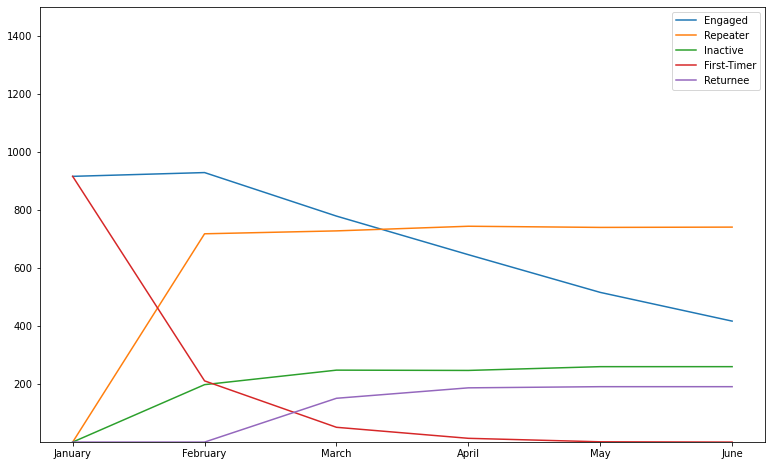

In [27]:
df_customercnt_agebracket.plot(kind="line", figsize = (13, 8), ylim = [1, 1500])

In [28]:
### Generation Alpha

df_customercategory_agebracket = []
for month in month_list:
    df_status = dict()
    for status in status_list:
        df_status[status] = len(df_customercount_withitems[(df_customercount_withitems[month + ' Status'].str.contains(status)) 
                                                           & (df_customercount_withitems['age_bracket'] == 'Generation Alpha')])
    df_customercategory_agebracket.append(df_status)
    
df_customercnt_agebracket = pd.DataFrame(df_customercategory_agebracket, index = month_list)
df_customercnt_agebracket

,Engaged,Repeater,Inactive,First-Timer,Returnee
January,537,0,0,537,0
February,516,416,121,100,0
March,445,409,143,36,85
April,360,412,148,10,113
May,276,401,161,2,121
June,230,420,149,2,116


<AxesSubplot:>

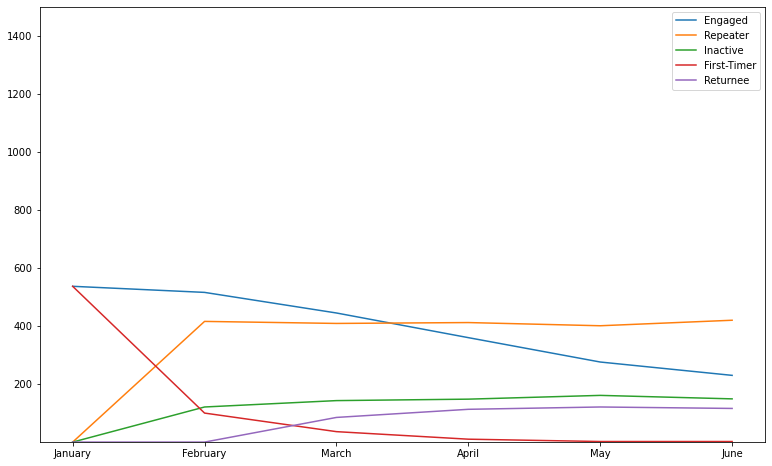

In [29]:
df_customercnt_agebracket.plot(kind="line", figsize = (13, 8), ylim = [1, 1500])

In [30]:
### States and Month (January; Engaged & First-Timer)

df_customercategory_stateaddress= []
for state_address in states.values():
    df_status = dict()
    for status in status_list:
        df_status[status] = len(df_customercount_withitems[(df_customercount_withitems['January Status'].str.contains(status)) 
                                                           & (df_customercount_withitems['state_address'] == state_address)])
    df_customercategory_stateaddress.append(df_status)
    
df_customercnt_stateaddress = pd.DataFrame(df_customercategory_stateaddress, index = states.values())
df_customercnt_stateaddress = df_customercnt_stateaddress.sort_values(by = 'Engaged', ascending = False)

separator = pd.DataFrame(dict(zip(status_list, [[" "] for x in range(len(status_list))])), index = [" "])
pd.concat([df_customercnt_stateaddress.head(5), separator, df_customercnt_stateaddress.tail(5)])

,Engaged,Repeater,Inactive,First-Timer,Returnee
Armed Forces the Americas,254,0,0,254,0
Armed Forces Europe,237,0,0,237,0
Armed Forces Pacific,227,0,0,227,0
Wyoming,146,0,0,146,0
Hawaii,139,0,0,139,0
,,,,,
Oregon,103,0,0,103,0
Connecticut,99,0,0,99,0
Nebraska,97,0,0,97,0
Washington,93,0,0,93,0


In [31]:
### States and Month (March; Inactive)

df_customercategory_stateaddress= []
for state_address in states.values():
    df_status = dict()
    for status in status_list:
        df_status[status] = len(df_customercount_withitems[(df_customercount_withitems['March Status'].str.contains(status)) 
                                                           & (df_customercount_withitems['state_address'] == state_address)])
    df_customercategory_stateaddress.append(df_status)
    
df_customercnt_stateaddress = pd.DataFrame(df_customercategory_stateaddress, index = states.values())
df_customercnt_stateaddress = df_customercnt_stateaddress.sort_values(by = 'Inactive', ascending = False)

separator = pd.DataFrame(dict(zip(status_list, [[" "] for x in range(len(status_list))])), index = [" "])
pd.concat([df_customercnt_stateaddress.head(5), separator, df_customercnt_stateaddress.tail(5)])

,Engaged,Repeater,Inactive,First-Timer,Returnee
Armed Forces the Americas,207,191,72,16,37
Armed Forces Europe,203,191,58,12,31
Armed Forces Pacific,201,190,55,11,34
Delaware,93,90,43,3,15
Texas,101,97,41,4,18
,,,,,
Nebraska,89,79,24,10,15
Massachusetts,105,100,23,5,23
Arkansas,100,91,22,9,19
Washington,83,79,21,4,15


In [32]:
### States and Month (March; Engaged)

df_customercategory_stateaddress= []
for state_address in states.values():
    df_status = dict()
    for status in status_list:
        df_status[status] = len(df_customercount_withitems[(df_customercount_withitems['March Status'].str.contains(status)) 
                                                           & (df_customercount_withitems['state_address'] == state_address)])
    df_customercategory_stateaddress.append(df_status)
    
df_customercnt_stateaddress = pd.DataFrame(df_customercategory_stateaddress, index = states.values())
df_customercnt_stateaddress = df_customercnt_stateaddress.sort_values(by = 'Engaged', ascending = False)

separator = pd.DataFrame(dict(zip(status_list, [[" "] for x in range(len(status_list))])), index = [" "])
pd.concat([df_customercnt_stateaddress.head(5), separator, df_customercnt_stateaddress.tail(5)])

,Engaged,Repeater,Inactive,First-Timer,Returnee
Armed Forces the Americas,207,191,72,16,37
Armed Forces Europe,203,191,58,12,31
Armed Forces Pacific,201,190,55,11,34
Wyoming,124,118,29,6,23
Ohio,117,105,29,12,20
,,,,,
Idaho,86,80,34,6,26
Colorado,86,79,33,7,22
Washington,83,79,21,4,15
Rhode Island,78,73,31,5,13


In [33]:
### States and Month (March; First-Timer)

df_customercategory_stateaddress= []
for state_address in states.values():
    df_status = dict()
    for status in status_list:
        df_status[status] = len(df_customercount_withitems[(df_customercount_withitems['March Status'].str.contains(status)) 
                                                           & (df_customercount_withitems['state_address'] == state_address)])
    df_customercategory_stateaddress.append(df_status)
    
df_customercnt_stateaddress = pd.DataFrame(df_customercategory_stateaddress, index = states.values())
df_customercnt_stateaddress = df_customercnt_stateaddress.sort_values(by = 'First-Timer', ascending = False)

separator = pd.DataFrame(dict(zip(status_list, [[" "] for x in range(len(status_list))])), index = [" "])
pd.concat([df_customercnt_stateaddress.head(5), separator, df_customercnt_stateaddress.tail(5)])

,Engaged,Repeater,Inactive,First-Timer,Returnee
Armed Forces the Americas,207,191,72,16,37
Armed Forces Europe,203,191,58,12,31
South Carolina,88,76,33,12,23
Ohio,117,105,29,12,20
Armed Forces Pacific,201,190,55,11,34
,,,,,
Missouri,87,84,37,3,11
Michigan,101,98,27,3,7
Iowa,89,86,32,3,16
Georgia,91,89,40,2,23


In [34]:
### States and Month (June; Inactive)

df_customercategory_stateaddress= []
for state_address in states.values():
    df_status = dict()
    for status in status_list:
        df_status[status] = len(df_customercount_withitems[(df_customercount_withitems['June Status'].str.contains(status)) 
                                                           & (df_customercount_withitems['state_address'] == state_address)])
    df_customercategory_stateaddress.append(df_status)
    
df_customercnt_stateaddress = pd.DataFrame(df_customercategory_stateaddress, index = states.values())
df_customercnt_stateaddress = df_customercnt_stateaddress.sort_values(by = 'Inactive', ascending = False)

separator = pd.DataFrame(dict(zip(status_list, [[" "] for x in range(len(status_list))])), index = [" "])
pd.concat([df_customercnt_stateaddress.head(5), separator, df_customercnt_stateaddress.tail(5)])

,Engaged,Repeater,Inactive,First-Timer,Returnee
Armed Forces Pacific,105,177,71,0,50
Armed Forces the Americas,109,189,71,0,60
Armed Forces Europe,116,192,60,0,43
Illinois,53,99,45,0,26
Maryland,52,100,43,0,19
,,,,,
Florida,51,87,23,0,37
Kentucky,54,93,23,0,27
Nebraska,55,86,23,0,19
Washington,50,82,20,0,20


In [35]:
### States and Month (June; Engaged)

df_customercategory_stateaddress= []
for state_address in states.values():
    df_status = dict()
    for status in status_list:
        df_status[status] = len(df_customercount_withitems[(df_customercount_withitems['June Status'].str.contains(status)) 
                                                           & (df_customercount_withitems['state_address'] == state_address)])
    df_customercategory_stateaddress.append(df_status)
    
df_customercnt_stateaddress = pd.DataFrame(df_customercategory_stateaddress, index = states.values())
df_customercnt_stateaddress = df_customercnt_stateaddress.sort_values(by = 'Engaged', ascending = False)

separator = pd.DataFrame(dict(zip(status_list, [[" "] for x in range(len(status_list))])), index = [" "])
pd.concat([df_customercnt_stateaddress.head(5), separator, df_customercnt_stateaddress.tail(5)])

,Engaged,Repeater,Inactive,First-Timer,Returnee
Armed Forces Europe,116,192,60,0,43
Armed Forces the Americas,109,189,71,0,60
Armed Forces Pacific,105,177,71,0,50
Wyoming,76,122,34,0,24
Indiana,64,97,31,0,28
,,,,,
California,43,79,30,0,33
Nevada,42,82,28,0,31
Alaska,40,75,42,0,28
Connecticut,40,78,36,0,26


In [36]:
f.close()